In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib auto
import os 
import seaborn as sns
import datetime as dt
import nltk
import spacy
#import locationtagger
import datetime as dt
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Mourad\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Mourad\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Mourad\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Mourad\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mourad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mourad\AppData\Roaming\nltk_data...
[nltk_data]   Package

True

In [34]:
#First of all we made Steps to collect all the 12 files of months to one file has all the data..

In [35]:
files = os.path.join(os.getcwd(), "Month*.csv") #Step 1 call for files named Month

In [37]:
files = glob.glob(files)    #Step 2 Made them joined all together 

In [38]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True) #Step 3 collect all of them and keeped on a variable

In [39]:
df #the data before separate the cities from purchase address

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [40]:
#df.to_csv("all csv.csv")

In [41]:
############################################  Filter 1  #############################################
# We find the data has a lot of nans so we made some filters to keep it clear as we could..

df[df["Order ID"].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
 #((Drop all the instances that have nans by using all not any))

In [43]:
df.dropna(how= "all", inplace=True, axis= 0, subset=["Order ID"] )

In [44]:
df[df["Order ID"].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [45]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [46]:
#################################################### Filter 2 ###############################################
# We had to use another filter to drop all the strings in order ID and all of them are named by "Order ID"..
df["Order ID"].value_counts()

Order ID    355
160873        5
178158        4
194253        4
226625        4
           ... 
310809        1
310810        1
310811        1
310812        1
259357        1
Name: Order ID, Length: 178438, dtype: int64

In [48]:
df.drop(df.index[df["Order ID"] == "Order ID"], inplace=True) #Here is the Step we used filter number2

In [49]:
df["Order ID"].value_counts()

160873    5
178158    4
194253    4
242936    4
212334    4
         ..
310809    1
310810    1
310811    1
310812    1
259357    1
Name: Order ID, Length: 178437, dtype: int64

In [50]:
df.shape

(185950, 6)

In [51]:
######################################### Filter 3 ##########################################
### We also used a Third filter to drop all the dublicated "Order ID" because we deal with this feature row
# as a Primary key in database so it should be has a unique value.


In [53]:
df.drop_duplicates(inplace=True, subset=["Order ID"]) #The step we used filter number 3

In [54]:
df["Order ID"].value_counts()

141234    1
199883    1
199875    1
199876    1
199877    1
         ..
309570    1
309571    1
309572    1
309573    1
259357    1
Name: Order ID, Length: 178437, dtype: int64

In [56]:
#new_df = pd.read_csv(r"C:\Users\shark\My trying notebooks\New folder\all2-csv.csv") #my path (#omar)

In [57]:
new_df = pd.read_csv("D:\\AI Eagles\\Assignments\\Final Project\\all2-csv.csv") #mourad path

In [58]:
#Here we made a big step as we know we had to do analysing to the data so we need as much as an a lot of information 
#And in this kind of data one of the most feature is the address or the location of Order ID who bought products
#So we find the address is not organized well so we separate the cities and streets into different rows 
#in this case we could made some visualizations to generate an important statistics.

In [59]:
new_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street,City
0,0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St,Boston,MA 02215",944 Walnut St,Boston
1,1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St,Portland,OR 97035",185 Maple St,Portland
2,2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St,San Francisco,CA 94016",538 Adams St,San Francisco
3,3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St,Los Angeles,CA 90001",738 10th St,Los Angeles
4,4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St,Austin,TX 73301",387 10th St,Austin


In [60]:
del new_df["Unnamed: 0"] #there was a column beside indices was used to count the data but we removed it


In [61]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St,Boston,MA 02215",944 Walnut St,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St,Portland,OR 97035",185 Maple St,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St,San Francisco,CA 94016",538 Adams St,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St,Los Angeles,CA 90001",738 10th St,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St,Austin,TX 73301",387 10th St,Austin


In [62]:
#We added an new column with name "Month" In order to expand the using of data and conducting the necessary analyzes..

In [63]:
new_df.drop_duplicates(inplace=True, subset=["Order ID"])
new_df['Order Date'] = pd.to_datetime(new_df['Order Date'], errors='coerce')
new_df['Month'] = pd.DatetimeIndex(new_df['Order Date']).month

In [64]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street,City,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St,Boston,MA 02215",944 Walnut St,Boston,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St,Portland,OR 97035",185 Maple St,Portland,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St,San Francisco,CA 94016",538 Adams St,San Francisco,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St,Los Angeles,CA 90001",738 10th St,Los Angeles,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St,Austin,TX 73301",387 10th St,Austin,1


In [65]:
####################################################(((#VISUALIZATION)))###################################################
#Firstly We used a visualization to analyse the most purchased products..

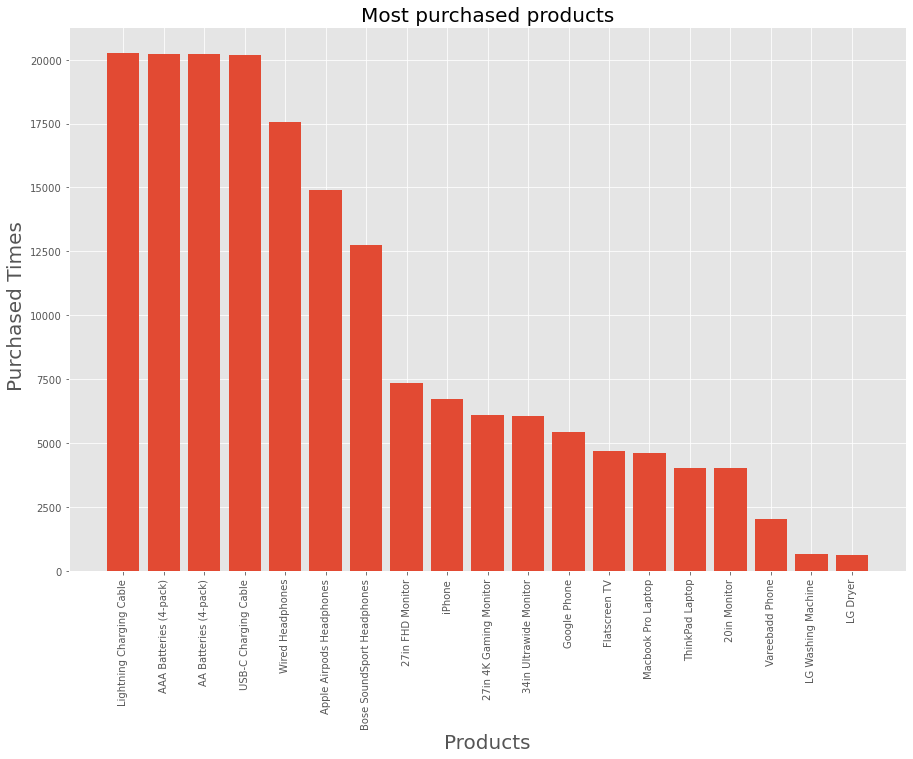

In [66]:
products= np.array(range(19))
count= new_df["Product"].value_counts() #change df to new_df
my_xticks =df_ele= [
"Lightning Charging Cable",
"AAA Batteries (4-pack)",
"AA Batteries (4-pack)",
"USB-C Charging Cable",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"27in 4K Gaming Monitor",
"34in Ultrawide Monitor",
"Google Phone",
"Flatscreen TV",
"Macbook Pro Laptop",
"ThinkPad Laptop",
"20in Monitor",
"Vareebadd Phone",
"LG Washing Machine",
"LG Dryer"
]
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(products, count)
plt.xticks(products, my_xticks,rotation=90 )


plt.title("Most purchased products", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Purchased Times  ", fontsize= 20)



plt.show()

In [68]:
#############################################################################################################

In [69]:
#We used a visualization to analyse the most Quantity Ordered..

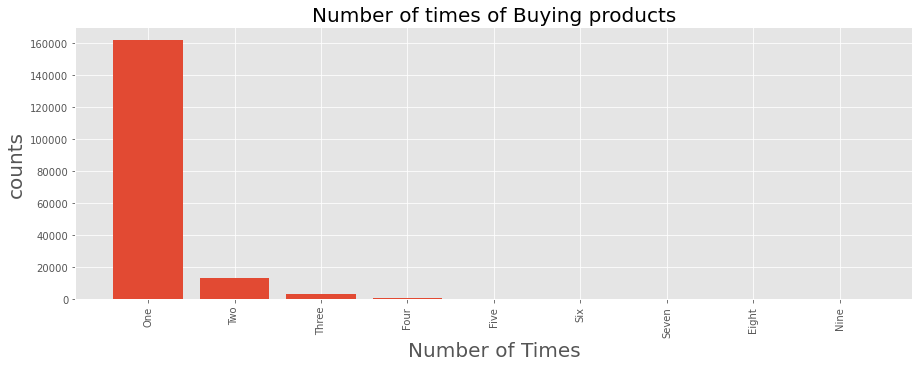

In [70]:
x= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y= new_df["Quantity Ordered"].value_counts()
my_xticks = ["One", "Two", "Three", "Four", "Five","Six","Seven","Eight","Nine"]
plt.figure(figsize=(15,5))
plt.style.use("ggplot")
plt.bar(x, y)
plt.xticks(x, my_xticks, rotation= 90)
plt.title("Number of times of Buying products", fontsize= 20)
plt.xlabel("Number of Times", fontsize= 20)
plt.ylabel("counts", fontsize= 20)

plt.show()

In [71]:
####################################################################################################################

In [72]:
#We used a visualization to analyse the most city which purchased products..

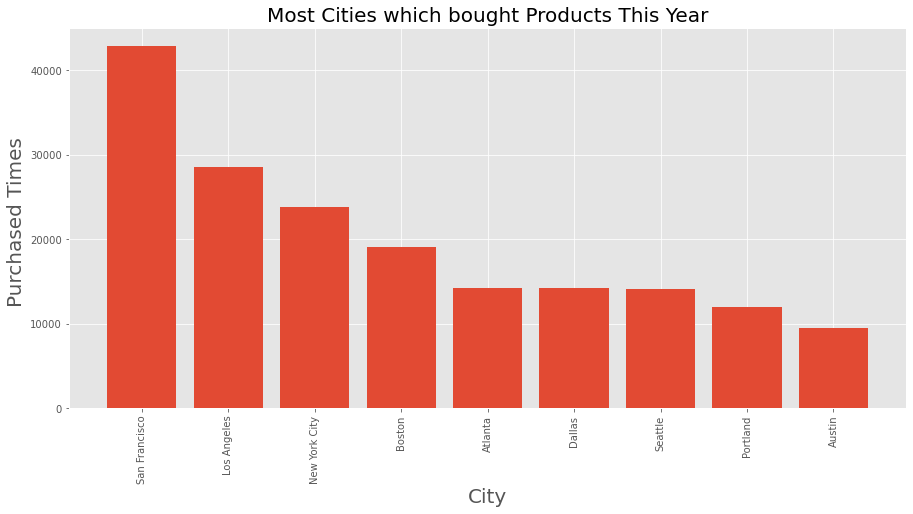

In [73]:
x= np.array(range(9))                              
count= new_df["City"].value_counts()
city = ["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.bar(x, count)
plt.xticks(x, city,rotation=90 )



plt.title("Most Cities which bought Products This Year", fontsize= 20)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Purchased Times ", fontsize= 20)



plt.show()

In [74]:
##################################################################################################################

In [75]:
#We used a visualization to find out the most city in which products were purchased in those months..

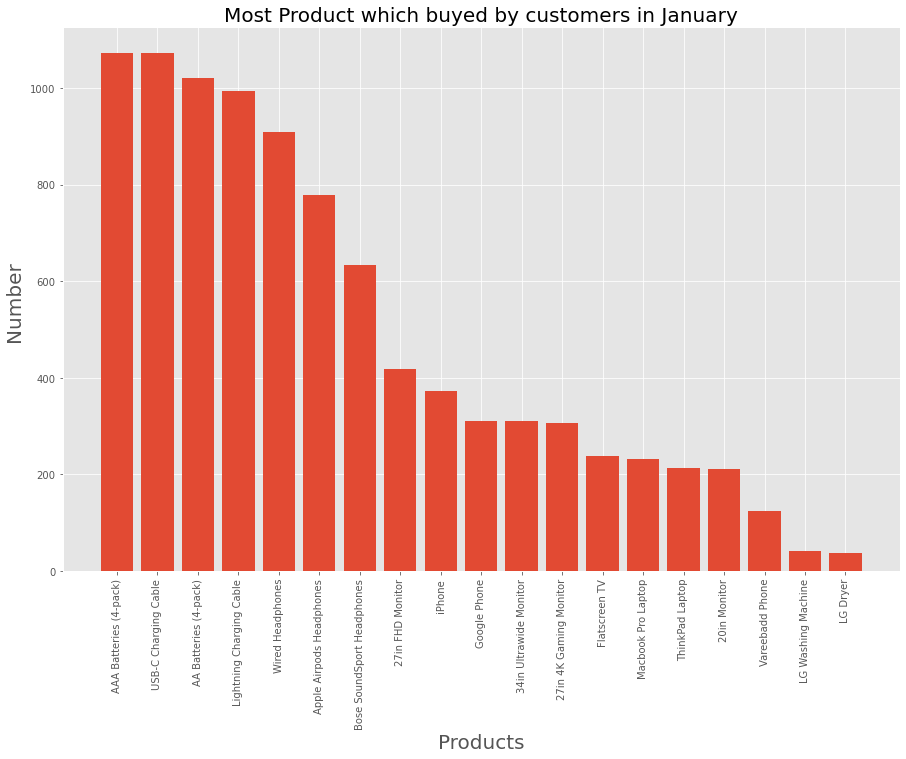

In [78]:
                                                   #January
x1= np.array(range(19))                             
count1= new_df[new_df["Month"]==1]["Product"].value_counts()
pro1 = ["AAA Batteries (4-pack)",
"USB-C Charging Cable",
"AA Batteries (4-pack)",
"Lightning Charging Cable",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"Google Phone",
"34in Ultrawide Monitor",
"27in 4K Gaming Monitor",
"Flatscreen TV",
"Macbook Pro Laptop",
"ThinkPad Laptop",
"20in Monitor",
"Vareebadd Phone",
"LG Washing Machine",
"LG Dryer"]
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x1, count1)
plt.xticks(x1, pro1,rotation=90 )



plt.title("Most Product which buyed by customers in January", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

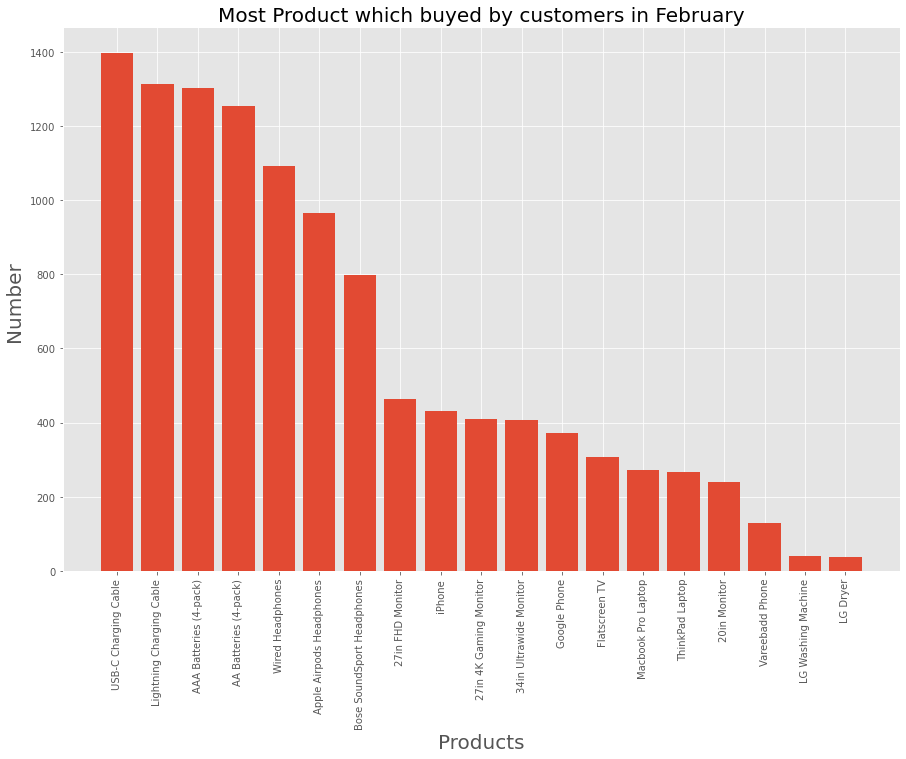

In [79]:
                                                #February
x2= np.array(range(19))                              
count2= new_df[new_df["Month"]==2]["Product"].value_counts()
pro2 = ["USB-C Charging Cable",
"Lightning Charging Cable",
"AAA Batteries (4-pack)",
"AA Batteries (4-pack)",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"27in 4K Gaming Monitor",
"34in Ultrawide Monitor",
"Google Phone",
"Flatscreen TV",
"Macbook Pro Laptop",
"ThinkPad Laptop",
"20in Monitor",
"Vareebadd Phone",
"LG Washing Machine",
"LG Dryer"]
plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x2, count2)
plt.xticks(x2, pro2,rotation=90 )



plt.title("Most Product which buyed by customers in February", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

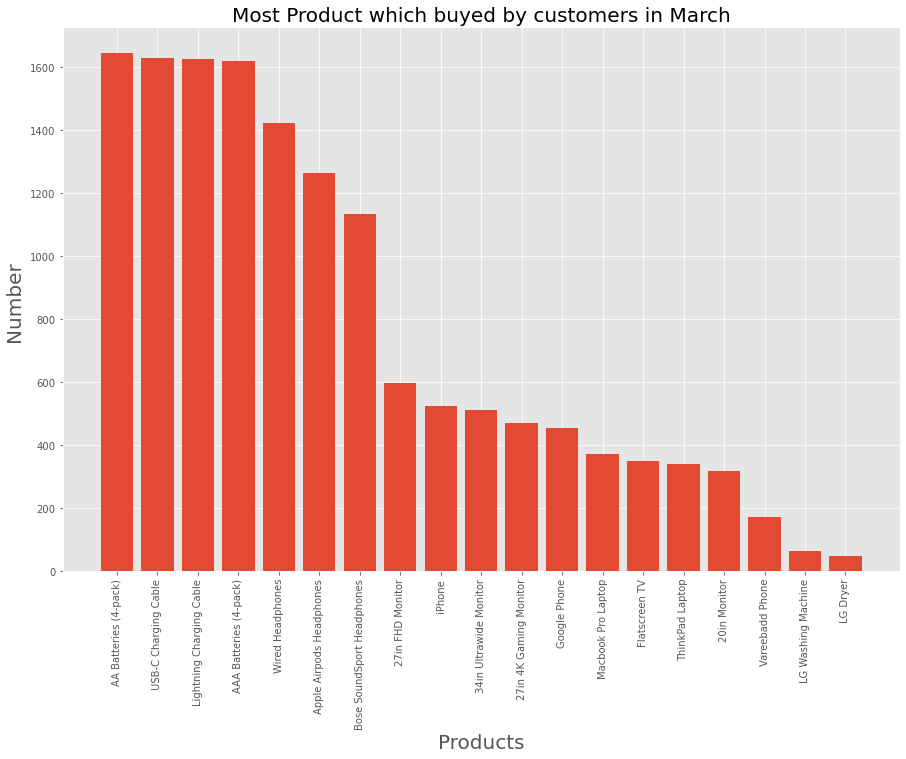

In [81]:
                                                        #March
x3= np.array(range(19))                                
count3= new_df[new_df["Month"]==3]["Product"].value_counts()
pro3 = ["AA Batteries (4-pack)",
"USB-C Charging Cable",
"Lightning Charging Cable",
"AAA Batteries (4-pack)",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"34in Ultrawide Monitor",
"27in 4K Gaming Monitor",
"Google Phone",
"Macbook Pro Laptop",
"Flatscreen TV",
"ThinkPad Laptop",
"20in Monitor",
"Vareebadd Phone",
"LG Washing Machine",
"LG Dryer"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x3, count3)
plt.xticks(x3, pro3,rotation=90 )



plt.title("Most Product which buyed by customers in March", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

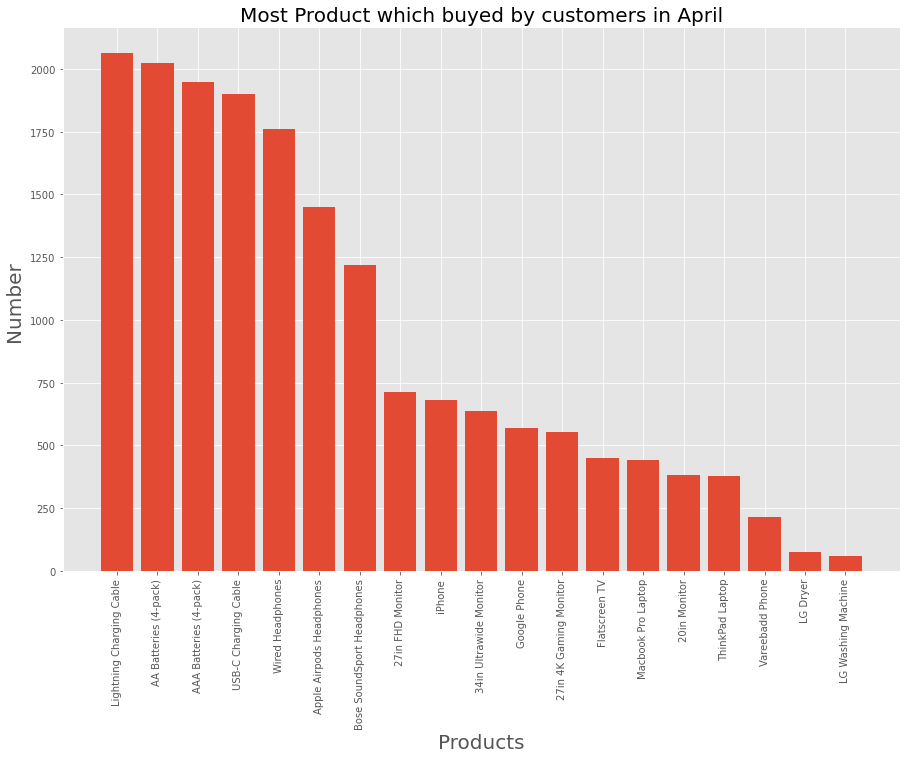

In [83]:
                                                    #April
x4= np.array(range(19))                               
count4= new_df[new_df["Month"]==4]["Product"].value_counts()
pro4 = ["Lightning Charging Cable",
"AA Batteries (4-pack)",
"AAA Batteries (4-pack)",
"USB-C Charging Cable",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"34in Ultrawide Monitor",
"Google Phone",
"27in 4K Gaming Monitor",
"Flatscreen TV",
"Macbook Pro Laptop",
"20in Monitor",
"ThinkPad Laptop",
"Vareebadd Phone",
"LG Dryer",
"LG Washing Machine"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x4, count4)
plt.xticks(x4, pro4,rotation=90 )



plt.title("Most Product which buyed by customers in April", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

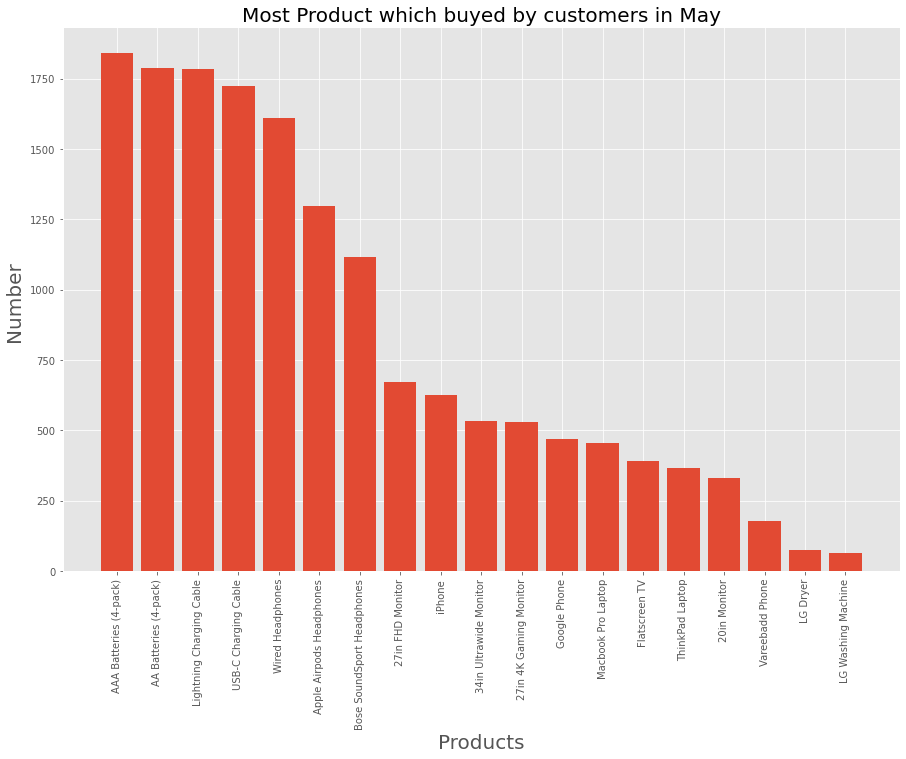

In [85]:
                                                       #May
x5= np.array(range(19))                                
count5= new_df[new_df["Month"]==5]["Product"].value_counts()
pro5 = ["AAA Batteries (4-pack)",
"AA Batteries (4-pack)",
"Lightning Charging Cable",
"USB-C Charging Cable",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"34in Ultrawide Monitor",
"27in 4K Gaming Monitor",
"Google Phone",
"Macbook Pro Laptop",
"Flatscreen TV",
"ThinkPad Laptop",
"20in Monitor",
"Vareebadd Phone",
"LG Dryer",
"LG Washing Machine"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x5, count5)
plt.xticks(x5, pro5,rotation=90 )



plt.title("Most Product which buyed by customers in May", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

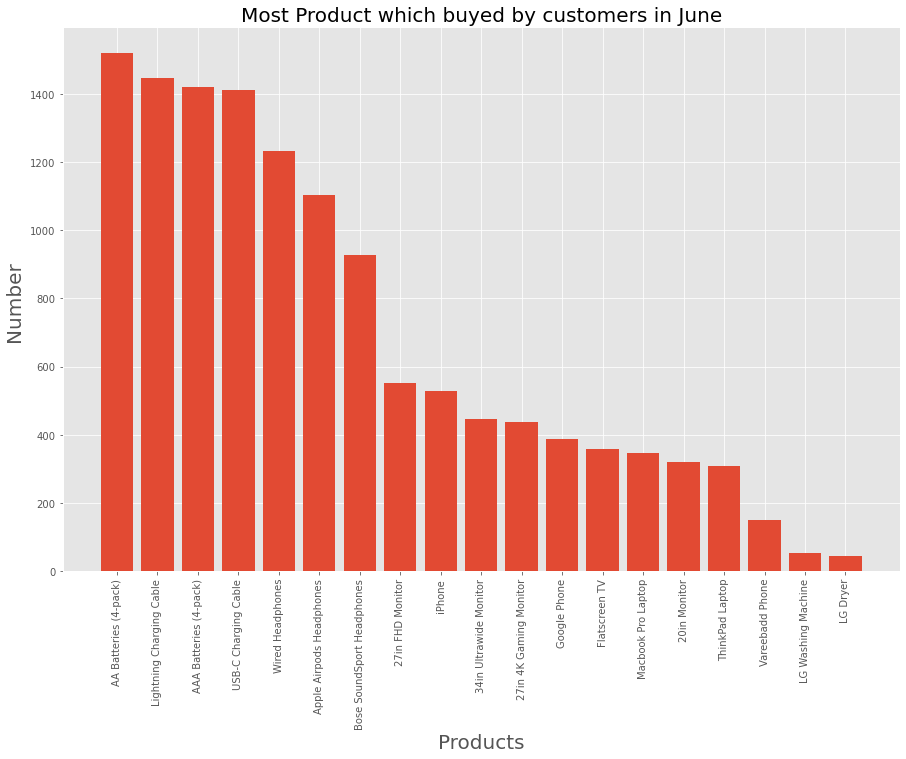

In [87]:
                                                      #June
x6= np.array(range(19))                               
count6= new_df[new_df["Month"]==6]["Product"].value_counts()
pro6 = ["AA Batteries (4-pack)",
"Lightning Charging Cable",
"AAA Batteries (4-pack)",
"USB-C Charging Cable",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"34in Ultrawide Monitor",
"27in 4K Gaming Monitor",
"Google Phone",
"Flatscreen TV",
"Macbook Pro Laptop",
"20in Monitor",
"ThinkPad Laptop",
"Vareebadd Phone",
"LG Washing Machine",
"LG Dryer"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x6, count6)
plt.xticks(x6, pro6,rotation=90 )



plt.title("Most Product which buyed by customers in June", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

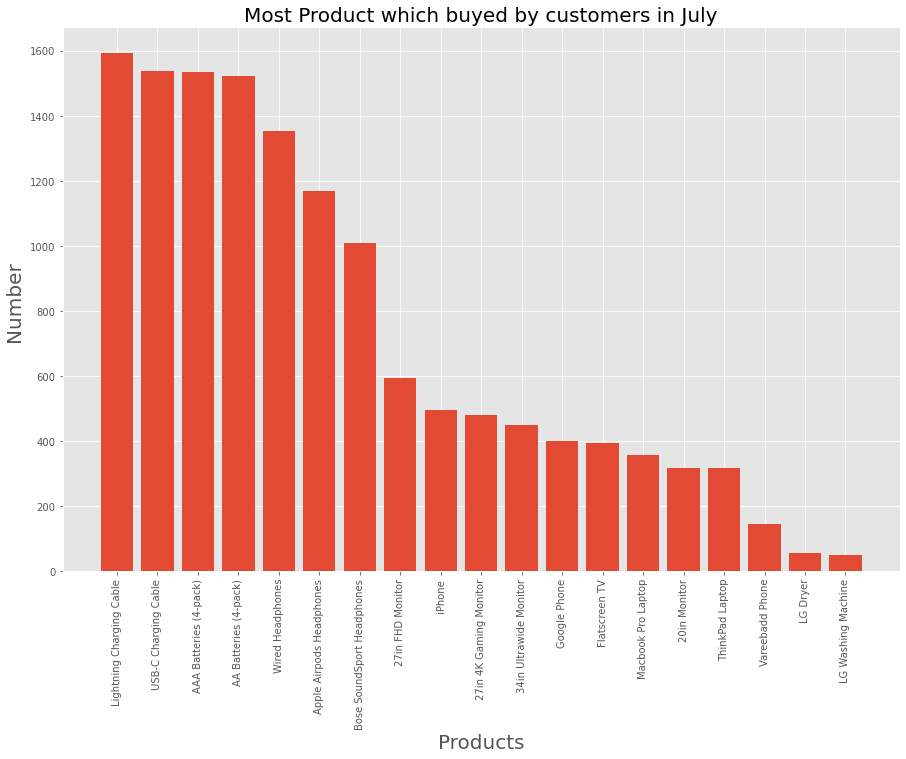

In [89]:
                                                       #July
x7= np.array(range(19))                                
count7= new_df[new_df["Month"]==7]["Product"].value_counts()
pro7 = ["Lightning Charging Cable",
"USB-C Charging Cable",
"AAA Batteries (4-pack)",
"AA Batteries (4-pack)",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"27in 4K Gaming Monitor",
"34in Ultrawide Monitor",
"Google Phone",
"Flatscreen TV",
"Macbook Pro Laptop",
"20in Monitor",
"ThinkPad Laptop",
"Vareebadd Phone",
"LG Dryer",
"LG Washing Machine"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x7, count7)
plt.xticks(x7, pro7,rotation=90 )



plt.title("Most Product which buyed by customers in July", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

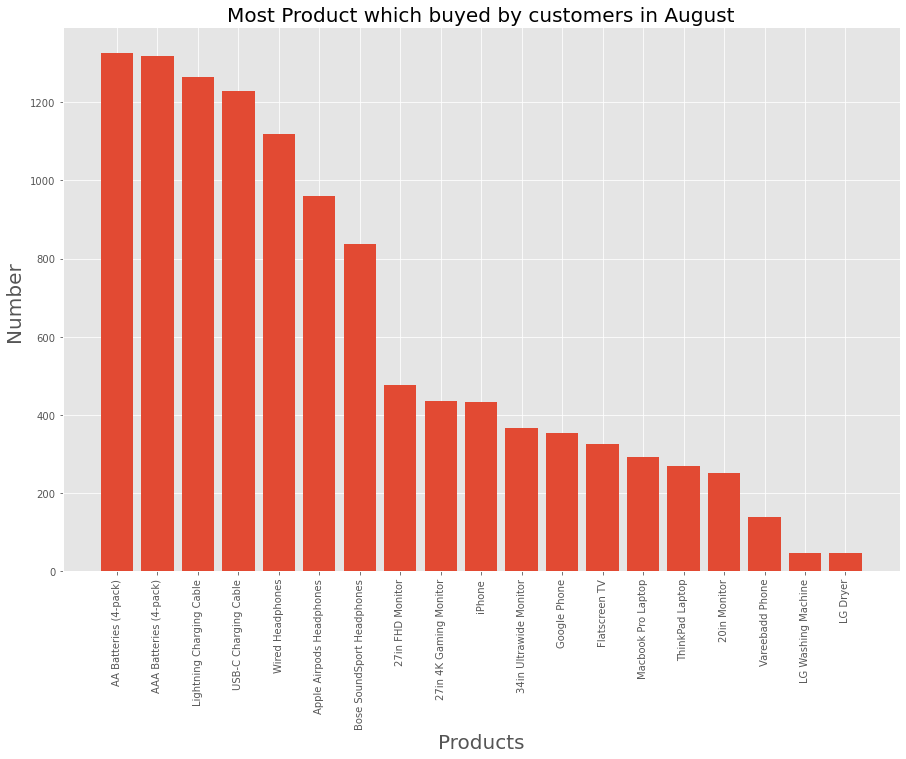

In [91]:
                                                    #August
x8= np.array(range(19))                               
count8= new_df[new_df["Month"]==8]["Product"].value_counts()
pro8 = ["AA Batteries (4-pack)",
"AAA Batteries (4-pack)",
"Lightning Charging Cable",
"USB-C Charging Cable",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"27in 4K Gaming Monitor",
"iPhone",
"34in Ultrawide Monitor",
"Google Phone",
"Flatscreen TV",
"Macbook Pro Laptop",
"ThinkPad Laptop",
"20in Monitor",
"Vareebadd Phone",
"LG Washing Machine",
"LG Dryer"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x8, count8)
plt.xticks(x8, pro8,rotation=90 )



plt.title("Most Product which buyed by customers in August", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

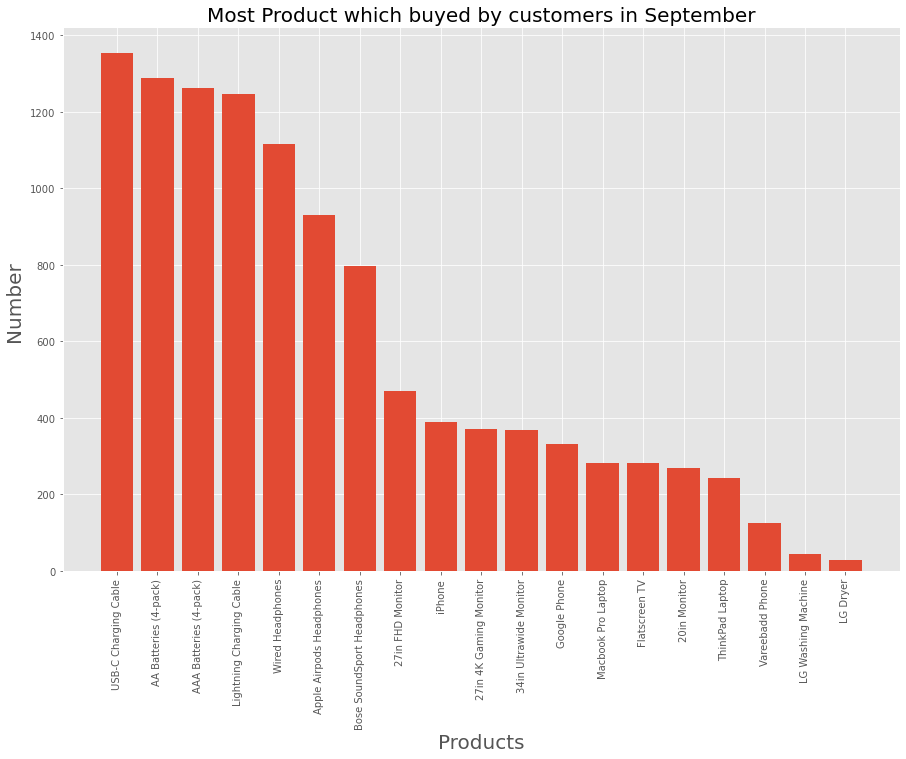

In [93]:
                                                     #September
x9= np.array(range(19))                                
count9= new_df[new_df["Month"]==9]["Product"].value_counts()
pro9 = ["USB-C Charging Cable",
"AA Batteries (4-pack)",
"AAA Batteries (4-pack)",
"Lightning Charging Cable",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"27in 4K Gaming Monitor",
"34in Ultrawide Monitor",
"Google Phone",
"Macbook Pro Laptop",
"Flatscreen TV",
"20in Monitor",
"ThinkPad Laptop",
"Vareebadd Phone",
"LG Washing Machine",
"LG Dryer"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x9, count9)
plt.xticks(x9, pro9,rotation=90 )



plt.title("Most Product which buyed by customers in September", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

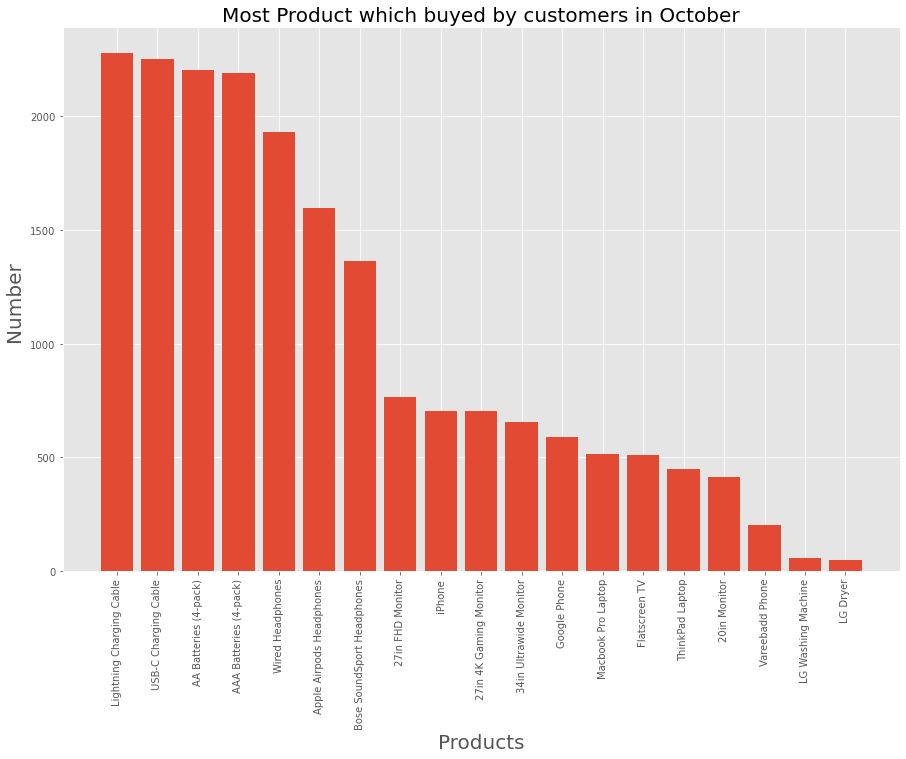

In [96]:
                                                    #October
x10= np.array(range(19))                                
count10= new_df[new_df["Month"]==10]["Product"].value_counts()
pro10 = ["Lightning Charging Cable",
"USB-C Charging Cable",
"AA Batteries (4-pack)",
"AAA Batteries (4-pack)",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"27in 4K Gaming Monitor",
"34in Ultrawide Monitor",
"Google Phone",
"Macbook Pro Laptop",
"Flatscreen TV",
"ThinkPad Laptop",
"20in Monitor",
"Vareebadd Phone",
"LG Washing Machine",
"LG Dryer"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x10, count10)
plt.xticks(x10, pro10,rotation=90 )



plt.title("Most Product which buyed by customers in October", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

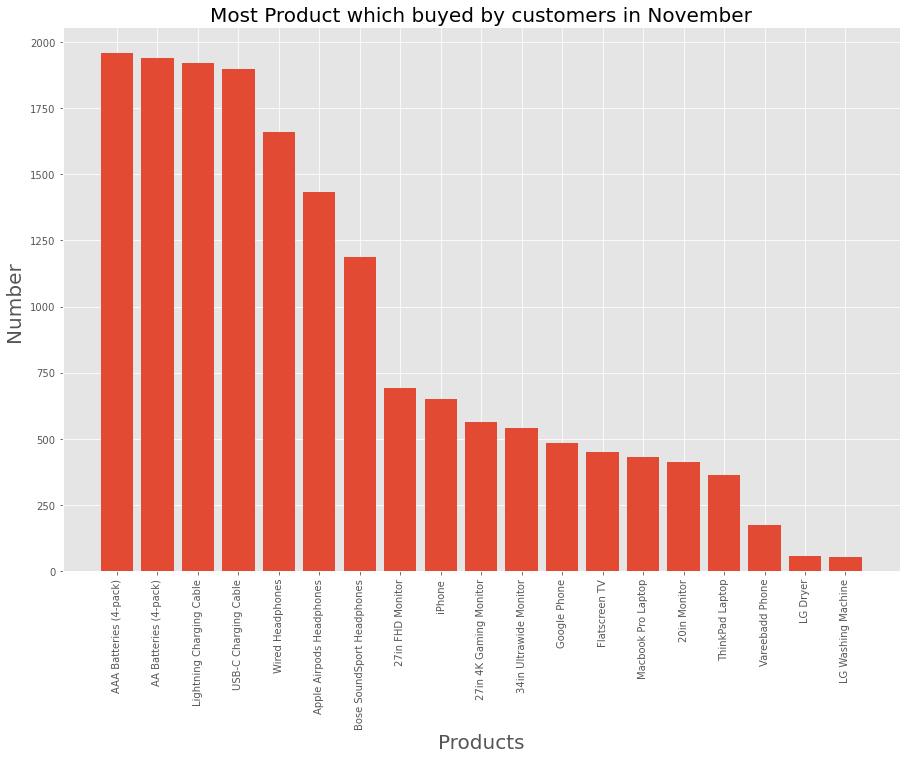

In [99]:
                                                       #November
x11= np.array(range(19))                                
count11= new_df[new_df["Month"]==11]["Product"].value_counts()
pro11 = ["AAA Batteries (4-pack)",
"AA Batteries (4-pack)",
"Lightning Charging Cable",
"USB-C Charging Cable",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"27in 4K Gaming Monitor",
"34in Ultrawide Monitor",
"Google Phone",
"Flatscreen TV",
"Macbook Pro Laptop",
"20in Monitor",
"ThinkPad Laptop",
"Vareebadd Phone",
"LG Dryer",
"LG Washing Machine"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x11, count11)
plt.xticks(x11, pro11,rotation=90 )



plt.title("Most Product which buyed by customers in November", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

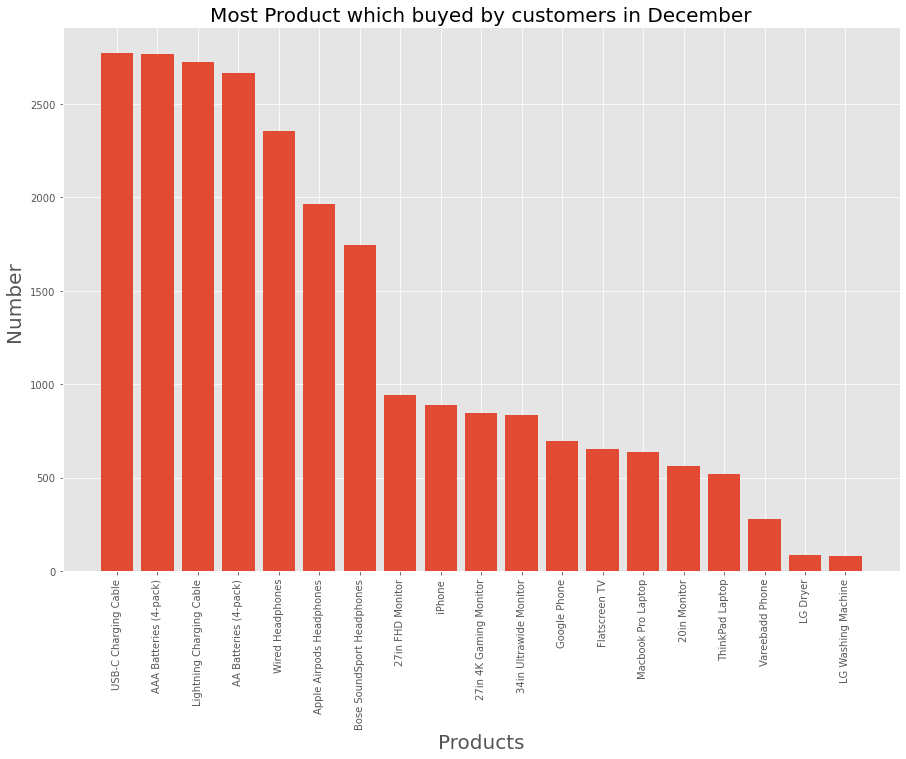

In [101]:
                                                       #December
x12= np.array(range(19))                              
count12= new_df[new_df["Month"]==12]["Product"].value_counts()
pro12 = ["USB-C Charging Cable",
"AAA Batteries (4-pack)",
"Lightning Charging Cable",
"AA Batteries (4-pack)",
"Wired Headphones",
"Apple Airpods Headphones",
"Bose SoundSport Headphones",
"27in FHD Monitor",
"iPhone",
"27in 4K Gaming Monitor",
"34in Ultrawide Monitor",
"Google Phone",
"Flatscreen TV",
"Macbook Pro Laptop",
"20in Monitor",
"ThinkPad Laptop",
"Vareebadd Phone",
"LG Dryer",
"LG Washing Machine"]

plt.figure(figsize=(15,10))
plt.style.use("ggplot")
plt.bar(x12, count12)
plt.xticks(x12, pro12,rotation=90 )



plt.title("Most Product which buyed by customers in December", fontsize= 20)
plt.xlabel("Products", fontsize= 20)
plt.ylabel("Number ", fontsize= 20)



plt.show()

In [102]:
###################################################################################################################

In [103]:
#We used another visualization to analyse and find the Most Cities Bought iphones This Year "as a sample" ...

In [104]:
#We used this code to determine the Most Cities Bought iphones This Year.. and then we used it into the visualization..

In [106]:
new_df[new_df["Product"] == "iPhone" ]["City"].value_counts() #step 1

San Francisco    1631
Los Angeles      1091
New York City     869
Boston            741
Seattle           539
Atlanta           533
Dallas            505
Portland          439
Austin            374
Name: City, dtype: int64

In [107]:
#Step 2

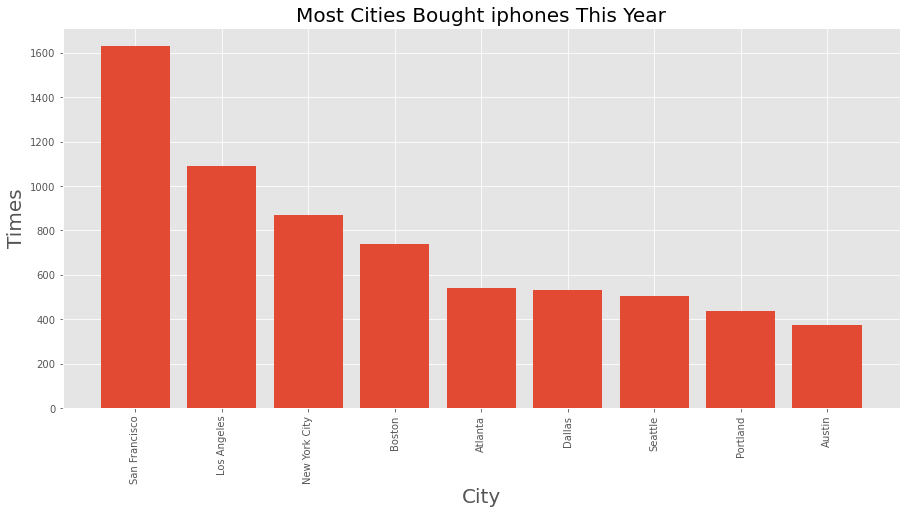

In [108]:
xx1= np.array(range(9))                            
countt= new_df[new_df["Product"] == "iPhone" ]["City"].value_counts()
cityy = ["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
plt.figure(figsize=(15,7))
plt.style.use("ggplot")
plt.bar(xx1, countt)
plt.xticks(xx1, cityy,rotation=90 )



plt.title("Most Cities Bought iphones This Year", fontsize= 20)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Times", fontsize= 20)



plt.show()

In [109]:
###########################################################################################################

In [110]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Street,City,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St,Boston,MA 02215",944 Walnut St,Boston,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St,Portland,OR 97035",185 Maple St,Portland,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St,San Francisco,CA 94016",538 Adams St,San Francisco,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St,Los Angeles,CA 90001",738 10th St,Los Angeles,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St,Austin,TX 73301",387 10th St,Austin,1


In [ ]:
#We used here box plot to find out the "min" , "max" , "median" , and the outliers points
#and we made this relation between (Month date, City) and (Price of each product)

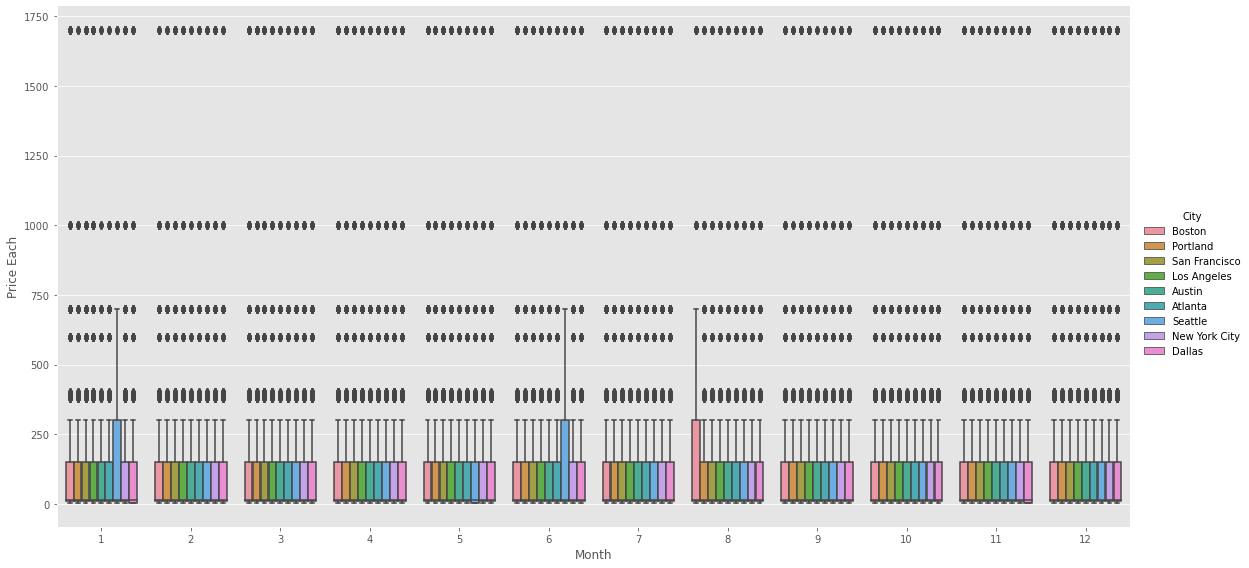

In [112]:
sns.catplot(
    data=new_df,
    x='Month',
    y='Price Each',
    hue="City",
    kind='box',
    height=8, # make the plot 5 units high
    aspect=2);
plt.show()

In [113]:
###########################################################################################################

In [ ]:
#We used here also box plot to find out the "min" , "max" , "median" , and the outliers points but 
#this time we made relation between (Quantity Ordered, City) and (each product) to analyse and compute 
#every quantity order in every city of each product. 

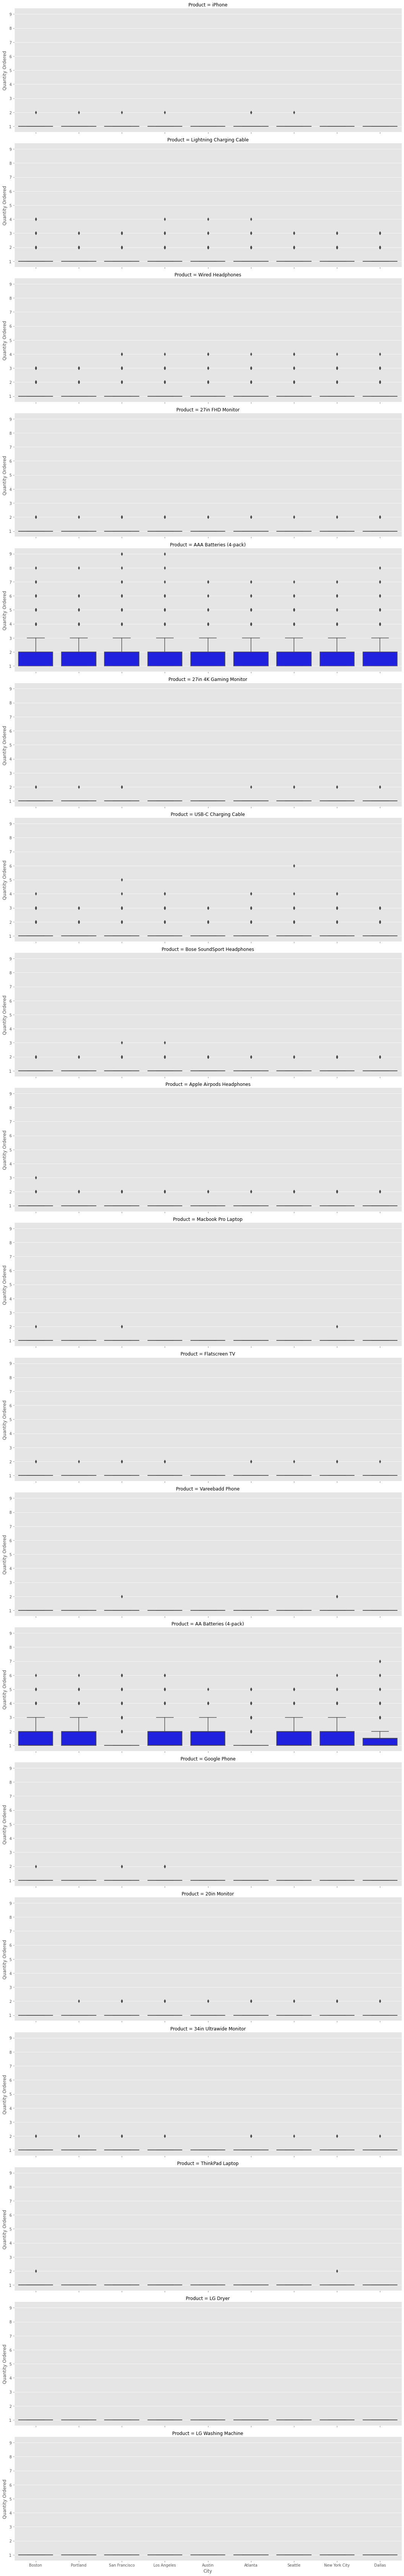

In [114]:
sns.catplot(
    data=new_df,
    x='City',
    y='Quantity Ordered',
    row='Product',
    kind='box',
    height=5, 
    aspect=3,
    color='blue')


In [115]:
new_df["Product"].unique() #we will take four products as a sample and do some visualization on them..

array(['iPhone', 'Lightning Charging Cable', 'Wired Headphones',
       '27in FHD Monitor', 'AAA Batteries (4-pack)',
       '27in 4K Gaming Monitor', 'USB-C Charging Cable',
       'Bose SoundSport Headphones', 'Apple Airpods Headphones',
       'Macbook Pro Laptop', 'Flatscreen TV', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'Google Phone', '20in Monitor',
       '34in Ultrawide Monitor', 'ThinkPad Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

####################################################################################################

In [ ]:
#We used another visualization to analyse and find the Most Cities Bought , ((AAA Batteries (4-pack),
#Lightning Charging Cable,Wired Headphones,27in FHD Monitor)) for This Year and we did it "as a sample" ...

Text(761.7272727272725, 0.5, 'Count ')

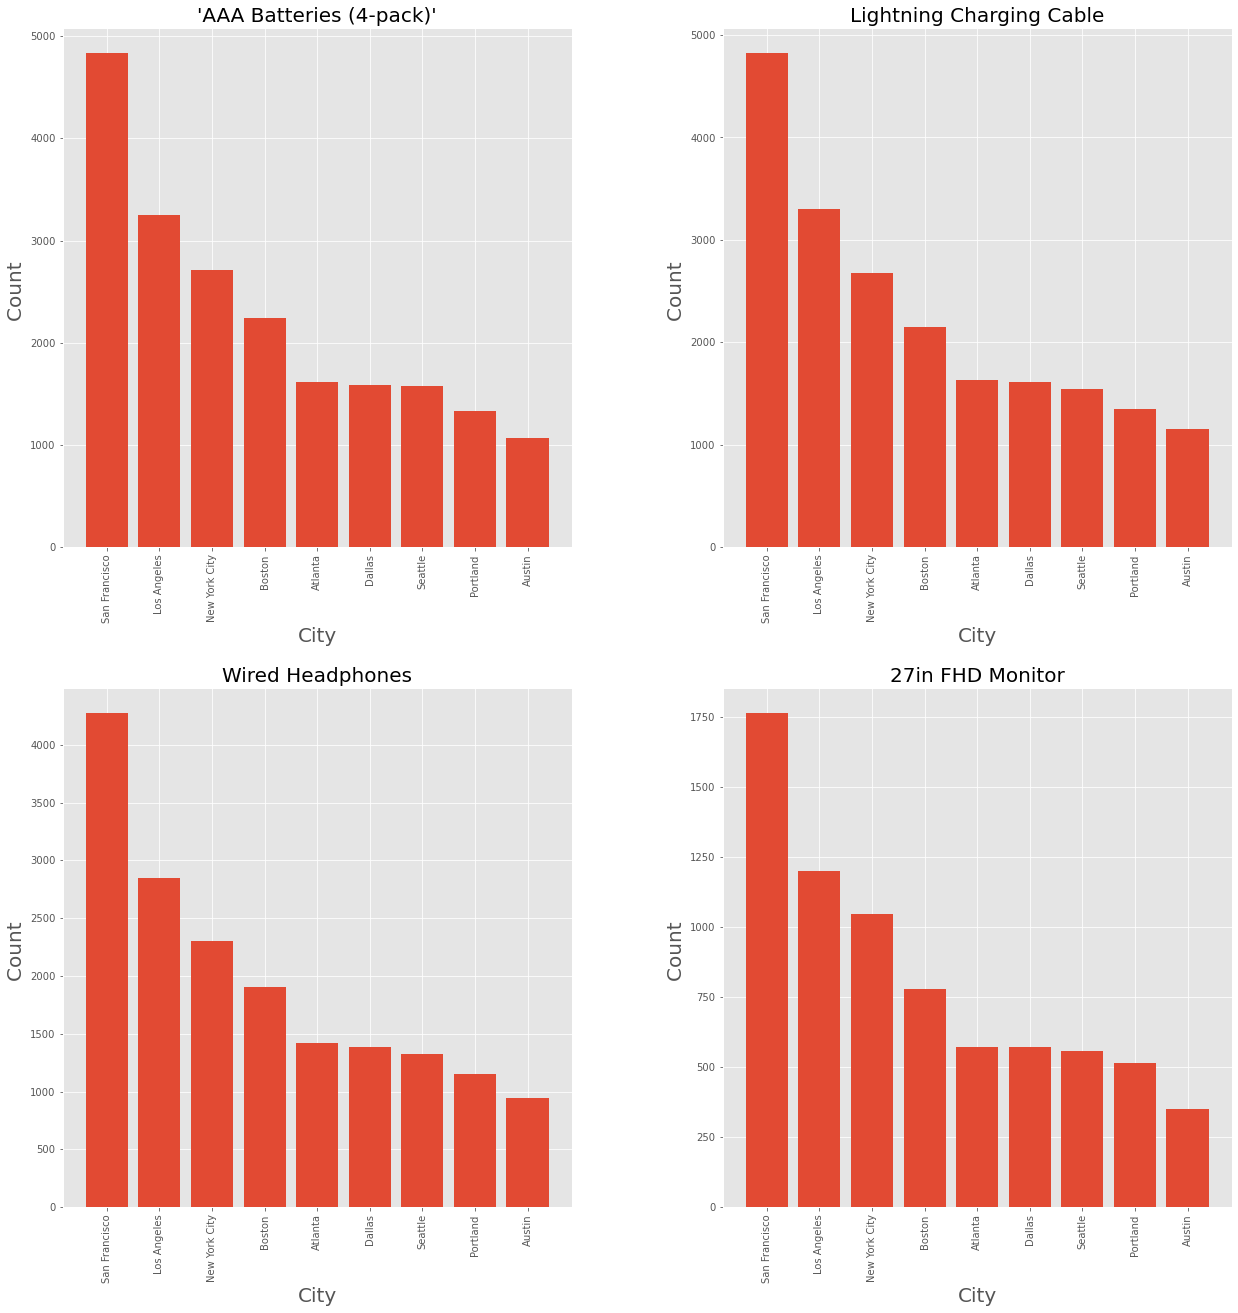

In [118]:
                                           #AAA Batteries (4-pack)
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
fig.tight_layout(pad=12)


plt.sca(ax[0, 0])
xx1= np.array(range(9))                              
countt1= new_df[new_df["Product"] == "AAA Batteries (4-pack)" ]["City"].value_counts()
cityy1 = ["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
plt.style.use("ggplot")
plt.bar(xx1, countt1)
plt.xticks(xx1, cityy1,rotation=90 )



plt.title("'AAA Batteries (4-pack)'", fontsize= 20)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Count ", fontsize= 20)
#############################################################################################################
                                               #Lightning Charging Cable
plt.sca(ax[0, 1])
xx2= np.array(range(9))                              
countt2= new_df[new_df["Product"] == "Lightning Charging Cable" ]["City"].value_counts()
cityy2 = ["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
plt.style.use("ggplot")
plt.bar(xx2, countt2)
plt.xticks(xx2, cityy2,rotation=90 )



plt.title("Lightning Charging Cable", fontsize= 20)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Count ", fontsize= 20)

###############################################################################################################
                                                     #Wired Headphones
plt.sca(ax[1, 0])
xx3= np.array(range(9))                              
countt3= new_df[new_df["Product"] == "Wired Headphones" ]["City"].value_counts()
cityy3 = ["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
plt.style.use("ggplot")
plt.bar(xx3, countt3)
plt.xticks(xx3, cityy3,rotation=90 )



plt.title("Wired Headphones", fontsize= 20)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Count ", fontsize= 20)
################################################################################################################
                                                     #27in FHD Monitor
plt.sca(ax[1, 1])
xx4= np.array(range(9))                             
countt4= new_df[new_df["Product"] == "27in FHD Monitor" ]["City"].value_counts()
cityy4 = ["San Francisco","Los Angeles","New York City","Boston","Atlanta","Dallas","Seattle","Portland","Austin"]
plt.style.use("ggplot")
plt.bar(xx4, countt4)
plt.xticks(xx4, cityy4,rotation=90 )



plt.title("27in FHD Monitor", fontsize= 20)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Count ", fontsize= 20)

In [ ]:
###################################################((FINISH))##################################################